<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%204/Semana_4_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Clássificação de insuficiência cardíaca

*Dataset com atributos de pacientes que tiveram insuficiência cardíaca e um atributo classificador para se eles morreram ou não.
*   `https://www.kaggle.com/andrewmvd/heart-failure-clinical-data`
*   Atributos descrevem
  *   Idade
  *   Anemia
  *   Creatinafosfoquinase
  *   Diabetes
  *   Fração de ejeção
  *   Pressão sanguínea alta
  *   Plaquetas
  *   Creatinina sérica
  *   Sódio sérico
  *   Sexo
  *   Fumante 
  *   Tempo
  *   Evento de morte

## 2. Montando o ambiente no google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 3. Carregando os dados na memória

In [7]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
#Lendo csv
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 4. Limpeza e organização dos dados

In [4]:
dados.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 5. Re-escala dos dados

In [6]:
dados = (dados - dados.min())/(dados.max() - dados.min())

## 6. Organizando os dados para modelagem

In [8]:
X = dados.iloc[:,:len(dados.columns) - 1]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [9]:
y = dados.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

## 7. Definindo algoritmo de agrupamento

In [12]:
#agrupamento
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Aplicando modelo de dados ao teste

In [13]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtyp

#### Visualizando os resultados do agrupamento 

In [14]:
X = X.reset_index(drop = True)

In [18]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'DEATH_EVENT',grupos)

In [23]:
sobreviveu = X[X['DEATH_EVENT']==0]
morreu = X[X['DEATH_EVENT']==1]

In [24]:
plt.rcParams["figure.figsize"] = (8,5)

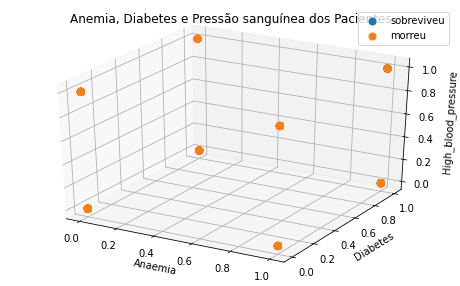

In [26]:
#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(sobreviveu.anaemia,sobreviveu.diabetes,sobreviveu.high_blood_pressure,s = 50, label = 'sobreviveu')
ax.scatter3D(morreu.anaemia,morreu.diabetes,morreu.high_blood_pressure,s=50,label='morreu')
plt.legend()
ax.set_xlabel('Anaemia')
ax.set_ylabel('Diabetes')
ax.set_zlabel('High_blood_pressure')
plt.title('Anemia, Diabetes e Pressão sanguínea dos Pacientes')
plt.show()


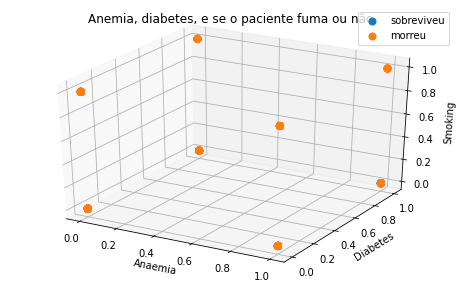

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(sobreviveu.anaemia,sobreviveu.diabetes,sobreviveu.smoking,s = 50, label = 'sobreviveu')
ax.scatter3D(morreu.anaemia,morreu.diabetes,morreu.smoking,s=50,label='morreu')
plt.legend()
ax.set_xlabel('Anaemia')
ax.set_ylabel('Diabetes')
ax.set_zlabel('Smoking')
plt.title('Anemia, diabetes, e se o paciente fuma ou não')
plt.show()


In [28]:
plt.rcParams["figure.figsize"] = (25,20)

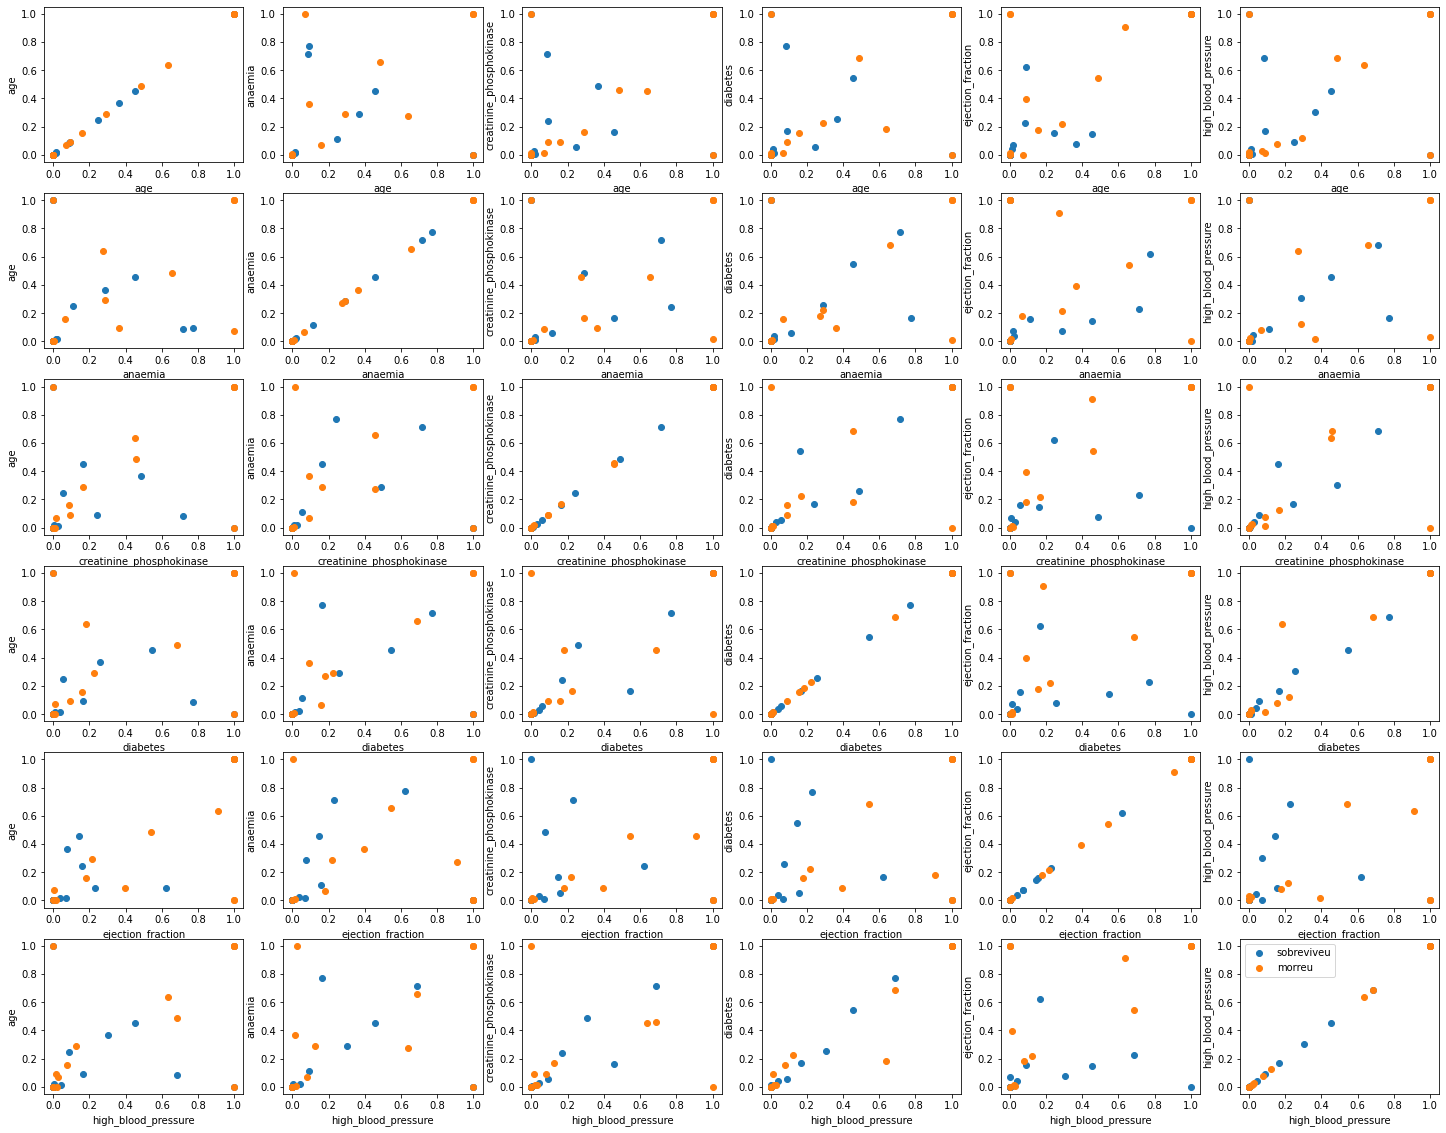

In [29]:
#plotando comparação de alguns atributos
fig, axs = plt.subplots(6,6)
for i in range(6):
  for j in range(6):
    axs[i,j].scatter(sobreviveu.iloc[i],sobreviveu.iloc[j],label='sobreviveu')
    axs[i,j].scatter(morreu.iloc[i],morreu.iloc[j],label='morreu')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

Os primeiros gráficos ficaram um pouco estranhos, isso pode se dar por conta da formatação dos parâmentros, mas com a matriz de gráficos apresentada é mais fácil de perceber os agrupamentos feitos. E pode se ter uma ideia do funcionamento do algoritmo de agrupamento.

## 8. Avaliando modelo

### Métricas para quando se conhecem as classes

#### Acurácia


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.445

A acurácia foi baixa, isso pode ser dar ppois os grupos formados não são necessariamente correspondentes as classes. Porém se pegarmor o complemento desse número daria ≅ 0.56 o que seria também baixa, já mostrando que o algoritmo pode não ter sido tão bom para este problema.

#### Índice Rand Ajustado

In [32]:
from sklearn.metrics import adjusted_rand_score

In [33]:
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-0.0018582102712868956

O indíce está abaixo de 0. Isso quer dizer que ta muito ruim esse agrupamento.

### Scores baseados em informação mútua

In [34]:
from sklearn.metrics import adjusted_mutual_info_score

In [35]:
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-0.0026317329715643684

O Score está abaixo de 0, so reforçando que esse problema não pode ser agrupado corretamente

### Fowlkes-Mallows scores
* Calculado como a média geométrica de precisão e recall
* Melhor agrupamento quando valor do índice é próximo de 1
* Pior agrupamento quando próximo de 0

In [36]:
from sklearn.metrics import fowlkes_mallows_score

In [37]:
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5517496230319365

Este Score ja conseguiu um resultado muito melhor que os anteriores, mas mesmo assim não está tão próximo de 1 para dizer que o agrupamento está bom.

#### Métricas quando as classes não são conhecidas

### Índice Davies-Boldin

In [39]:
#excluindo a coluna de classificação
X = X.drop(columns=['DEATH_EVENT'])

In [40]:
from sklearn.metrics import davies_bouldin_score

In [41]:
db = davies_bouldin_score(X,kmeans_labels)
db

1.840182478089779

Como não tenho um valor para comparar, não consigo afirmar o quão bom esse score se saiu, mas ele está longe de 0, mostando que também não está muito ruim.

### Coeficiente de Silhueta

In [53]:
from sklearn.metrics import silhouette_score

In [54]:
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.20837168230969513

Este coeficiente está próximo de 0, o resultado não foi bom.

### Índice Calinski-Harabasz 


In [42]:
from sklearn.metrics import calinski_harabasz_score

In [43]:
ch = calinski_harabasz_score(X,kmeans_labels)
ch

76.99609791364563

O valor para este índice está alto, mas como não tenho um outro valor para comparação não consigo afirmar se este valor é satisfatório.

## 9. Agrupamento Hierárquico

In [44]:
from sklearn.cluster import AgglomerativeClustering

### Definindo modelo e realizando o agrupamento

In [45]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [46]:
labels_hierarquico

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

#### Avaliando o modelo

In [47]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.532

In [48]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

-0.006835288005468078

In [49]:
#índice baseado em informação mútua
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

-0.001961478059554984

In [50]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.542877045160299

In [51]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db

1.9662787130613664

In [55]:
#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.19099897077503347

In [56]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

69.74579167357409

Os resultados do agrupamento hierárquico foram melhores, mas isso não quer dizer que tenham sido bons, os índices, coeficientes e scores continuaram muito baixos.

## 10. Interpretação final

O agrupamento não foi bom para fazer a classificação desse problema, isso pode se dar por conta do problema não ser facilmente separável, como foi visto em alguns notebooks anteriores este problema é de difícil classificação com os atributos presentes no dataset, alguns atributos representando condições externas dos pacientes poderiam ajudar a melhorar essa classificação. Os índices de avaliação foram muito baixos para ambos os agrupamentos, então esse método não seria nem um pouco recomendado para o problema em questão e uma nova coleta de dados provavélmente seria necessária para fazer esta classificação.